# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
# METADADOS DA BASE
metadados = pd.DataFrame(df.nunique()).reset_index()
metadados.columns=['variaveis','qtd_categorias']
tp = []
tp = list(df.dtypes)
metadados['tipo_dados'] = tp
metadados.set_index('variaveis')

,qtd_categorias,tipo_dados
variaveis,,
age,41,float64
sex,2,float64
cp,4,float64
trestbps,50,float64
chol,152,float64
fbs,2,float64
restecg,3,float64
thalach,91,float64
exang,2,float64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


In [5]:
#LIMPEZA DA BASE E TRATAMENTO DE DADOS AUSENTES
df.isnull().sum()
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [6]:
def bivar(df,resposta,explicativa):
    tab=pd.crosstab(df[resposta], df[explicativa], margins= True)
    return tab
    

In [7]:
bivar(df,'sex','flag_doente')

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [8]:
bivar(df,'sex','slope')

slope,1.0,2.0,3.0,All
sex,,,,
0.0,47,45,5,97
1.0,95,95,16,206
All,142,140,21,303


In [9]:
bivar(df,'sex','exang')

exang,0.0,1.0,All
sex,,,
0.0,75,22,97
1.0,129,77,206
All,204,99,303


In [10]:
bivar(df,'sex','thal')

thal,3.0,6.0,7.0,?,All
sex,,,,,
0.0,80,1,15,1,97
1.0,86,17,102,1,206
All,166,18,117,2,303


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [11]:
def bivar_cat(df,resposta,explicativa,quebra=5):
    tab=pd.crosstab(df[resposta], 
                    pd.qcut(df[explicativa],quebra,duplicates='drop'), 
                    margins= True)
    return tab
    

In [12]:
bivar_cat(df,'sex','age')

age,"(28.999, 45.0]","(45.0, 53.0]","(53.0, 58.0]","(58.0, 62.0]","(62.0, 77.0]",All
sex,,,,,,
0.0,18,17,22,15,25,97
1.0,45,47,49,30,35,206
All,63,64,71,45,60,303


In [13]:
bivar_cat(df,'sex','thalach')

thalach,"(70.999, 130.0]","(130.0, 146.0]","(146.0, 159.0]","(159.0, 170.0]","(170.0, 202.0]",All
sex,,,,,,
0.0,17,15,24,26,15,97
1.0,46,44,38,36,42,206
All,63,59,62,62,57,303


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [14]:
df['sex_encoded'] = df.sex.map({1:'male', 0:'female'})

In [15]:

reglog = smf.logit('flag_doente ~ C(sex_encoded) + C(cp) + age', data=df).fit()
reglog.summary()


Optimization terminated successfully.
         Current function value: 0.484937
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Tue, 27 Sep 2022   Pseudo R-squ.:                  0.2969
Time:                        19:18:02   Log-Likelihood:                -146.94
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 4.225e-25
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -6.0793      1.236     -4.920      0.000      -8.501      -3.658
C(sex_encoded)[T.male]     1.7195      0.343      5.008      0.000       1.047       2.392
C(cp)[T.2.0]              -0.2530      0.618     -0.410      0.682      -1.464       0.958
C(cp)[T.3.0]              -0.1043      0.556     -0.188      0.851      -1.194       0.985
C(cp)[T.4.0]               2.2726      0.532      4.269      0.000       1.229       3.316
age                        0.0666      0.018      3.770      0.000       0.032       0.101
==========================================================================================
"""

In [16]:
coef = {'Intercept':[reglog.params[0]],
        'sex':[reglog.params[1]],
        'cp2':[reglog.params[2]],
        'cp3':[reglog.params[3]],
        'cp4':[reglog.params[4]],
        'age':[reglog.params[5]]
        
#         'qt_pessoas_residencia':[modelo.params[7]]
       }
df_coef = pd.DataFrame(data=coef)

r_cp=int(input('Chest pain type: (1)typical angina - (2) atypical angina - (3) non-anginal pain - (4) asymptomatic: ')) 
if r_cp == 2:
    p_cp=df_coef['cp2'][0]
elif r_cp == 3:
    p_cp=df_coef['cp3'][0]
elif r_cp == 4:
    p_cp=df_coef['cp4'][0]
else:
    p_cp=0   
eta = reglog.params[0] + p_cp + reglog.params[4]+ reglog.params[5]
chance=np.exp(eta)
print(f'\nChance: {round(chance,4)}')
print(f'Probabilidade de estar doente: {round(1/(1+np.exp(-eta))*100,2)}%')


Chest pain type: (1)typical angina - (2) atypical angina - (3) non-anginal pain - (4) asymptomatic:  3



Chance: 0.0214
Probabilidade de estar doente: 2.1%


### Conclusão
O modelo de regressão logística evidencia que um indivíduo do sexo masculino apresentando um 'cp' (chest pain) = 4 possui uma alta probabilidade de estar doente se comparado com os demais.
Além disso, a variável 'age' demonstra que o aumento da idade acaba contribuindo para a ocorrência do evento.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [17]:
df['predito'] = reglog.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,sex_encoded,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,male,0.459254
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,male,0.914958
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,male,0.914958
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,male,0.119250
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,female,0.026564


In [18]:
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

(0.015799999999999998, 0.151]    61
(0.151, 0.296]                   61
(0.296, 0.559]                   60
(0.559, 0.819]                   62
(0.819, 0.954]                   59
Name: predito, dtype: int64

In [19]:
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid

,contagem
predito,
"(0.015799999999999998, 0.151]",61
"(0.151, 0.296]",61
"(0.296, 0.559]",60
"(0.559, 0.819]",62
"(0.819, 0.954]",59


In [20]:
qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.015799999999999998, 0.151]",61,0.079034
"(0.151, 0.296]",61,0.222489
"(0.296, 0.559]",60,0.425583
"(0.559, 0.819]",62,0.699826
"(0.819, 0.954]",59,0.875981


In [21]:
qualid['%_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,%_doente
predito,,,
"(0.015799999999999998, 0.151]",61,0.079034,0.065574
"(0.151, 0.296]",61,0.222489,0.147541
"(0.296, 0.559]",60,0.425583,0.533333
"(0.559, 0.819]",62,0.699826,0.709677
"(0.819, 0.954]",59,0.875981,0.847458


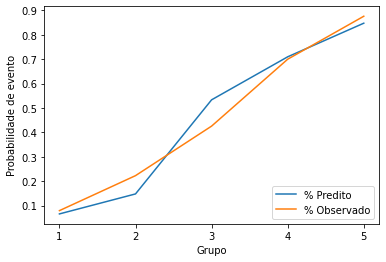

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['%_doente'].plot(label='% Predito')
ax = qualid['predito'].plot(label='% Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo');

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,sex_encoded,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,male,0.459254
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,male,0.914958
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,male,0.914958
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,male,0.119250
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,female,0.026564


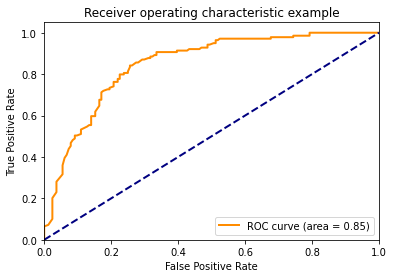

In [24]:
# CURVA ROC
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


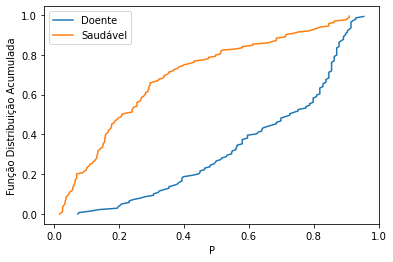

In [25]:
# GRAFICO KS
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = df.loc[df['flag_doente']==1,'predito']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Doente')

score_pop2 = df.loc[df['flag_doente']!=1,'predito']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Saudável')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada');

In [26]:
# INDICADORES
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 76.90%
KS: 58.56% 
AUC: 84.83% 
GINI: 69.65%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [27]:
# RODANDO STEPWISE PARA SELEÇÃO DE VARIÁVEIS DO MODELO
X = df.copy()    
X.drop(['flag_doente','sex_encoded','predito'],axis=1,inplace=True)
X = pd.get_dummies(X, columns=['ca','thal'], drop_first=True)
print(X.shape)
y=np.array(df['flag_doente'].values)
print(y.shape)
np.sort(y)

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("-"*60)
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X, y)

print('\nresulting features:')
print(variaveis)


X=X[variaveis]
X.columns = X.columns.str.replace(' ', '_')
X.head(1)

(303, 19)
(303,)
Add  num                            with p-value 2.48794e-78
------------------------------------------------------------
['num']
Add  exang                          with p-value 0.000474668
------------------------------------------------------------
['num', 'exang']
Add  ca_1.0                         with p-value 0.00159867
------------------------------------------------------------
['num', 'exang', 'ca_1.0']
Add  thal_7.0                       with p-value 0.00485418
------------------------------------------------------------
['num', 'exang', 'ca_1.0', 'thal_7.0']
------------------------------------------------------------
['num', 'exang', 'ca_1.0', 'thal_7.0']

resulting features:
['num', 'exang', 'ca_1.0', 'thal_7.0']


,num,exang,ca_1.0,thal_7.0
0,0,0.0,0,0


In [28]:
df2=pd.concat([df[['flag_doente','age']], X], axis=1)

df2.rename(columns={'ca_1.0': 'ca_1',
                   'thal_7.0': 'thal_7'}, inplace=True)
df2.head()

,flag_doente,age,num,exang,ca_1,thal_7
0,0,63.0,0,0.0,0,0
1,1,67.0,2,1.0,0,0
2,1,67.0,1,1.0,0,1
3,0,37.0,0,0.0,0,0
4,0,41.0,0,0.0,0,0


In [29]:
# METADADOS DA BASE
metadados = pd.DataFrame(df2.nunique()).reset_index()
metadados.columns=['variaveis','qtd_categorias']
tp = []
tp = list(df2.dtypes)
metadados['tipo_dados'] = tp
metadados.set_index('variaveis')

,qtd_categorias,tipo_dados
variaveis,,
flag_doente,2,int64
age,41,float64
num,5,int64
exang,2,float64
ca_1,2,uint8
thal_7,2,uint8


### Observação
A variável 'num', embora tenha sido selecionada pelo método STEPWISE, teve que ser excluída por se tratar de um caso de 'separação quase perfeita'. 

In [30]:
bivar(df2,'flag_doente','num')

num,0,1,2,3,4,All
flag_doente,,,,,,
0,164,0,0,0,0,164
1,0,55,36,35,13,139
All,164,55,36,35,13,303


In [31]:
reglog = smf.logit('flag_doente ~  age +  exang + C(ca_1) + C(thal_7)', data=df2).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.485015
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Tue, 27 Sep 2022   Pseudo R-squ.:                  0.2968
Time:                        19:18:07   Log-Likelihood:                -146.96
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 7.238e-26
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.1637      0.952     -4.375      0.000      -6.029      -2.298
C(ca_1)[T.1]       0.8633      0.360      2.397      0.017       0.157       1.569
C(thal_7)[T.1]     1.9301      0.299      6.449      0.000       1.343       2.517
age                0.0461      0.017      2.765      0.006       0.013       0.079
exang              1.6796      0.315      5.325      0.000       1.061       2.298
==================================================================================
"""

In [32]:
df2['predito'] = reglog.predict(df2)


cat_pred = pd.qcut(df2['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

group_reg = df2.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid

qualid['predito'] = group_reg['predito'].mean()
qualid

qualid['%_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,%_doente
predito,,,
"(0.0548, 0.146]",63,0.109415,0.047619
"(0.146, 0.252]",58,0.194700,0.293103
"(0.252, 0.563]",63,0.420454,0.380952
"(0.563, 0.806]",58,0.684913,0.706897
"(0.806, 0.972]",61,0.895093,0.885246


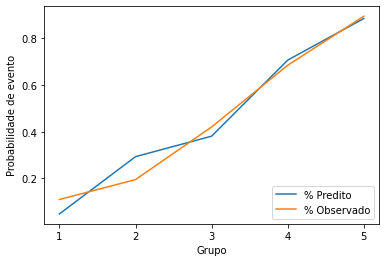

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['%_doente'].plot(label='% Predito')
ax = qualid['predito'].plot(label='% Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo');

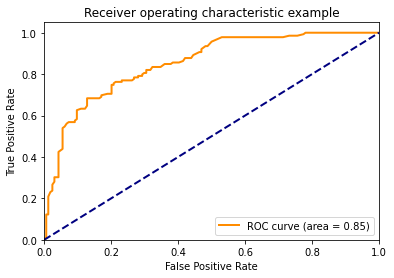

In [34]:
# CURVA ROC
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(df2['flag_doente'], df2['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df2['flag_doente'], df2['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

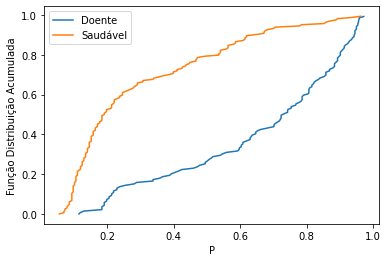

In [35]:
# GRAFICO KS
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = df2.loc[df['flag_doente']==1,'predito']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Doente')

score_pop2 = df2.loc[df['flag_doente']!=1,'predito']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Saudável')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada');

In [36]:
# INDICADORES
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df2['flag_doente'], df2['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df2['flag_doente'], df2['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df2.loc[df2['flag_doente'] == 1, 'predito'], df2.loc[df2['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 76.90%
KS: 55.54% 
AUC: 85.25% 
GINI: 70.50%


### CONCLUSÃO
Mesmo utilizando-se as melhores variáveis indicadas pelo método STEPWISE e com adição e exclusão de outras mais, não foi possível observar significativas melhoras no modelo, ficando a acurácia inalterada.

Modelo 1 

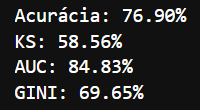

Modelo 2 

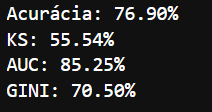

